In [43]:
%%writefile NodeFunctions.py

import numpy as np
import random 
from InitializationVariables import *

def activationThreshold(inputValue):
    probability = np.arctan(inputValue / 100) * 2 / np.pi
    roll = random.random()
    return roll > probability

    


def updateAngularVelocity(fire):
    if fire: return 1
    return 0
    
def updateAngle(fire):
    if fire: return 1
    return 0

def updateVelocity(fire):
    if fire: return 1
    return 0


##Action Functions: Input value from a single source range [-100, 100], sum all sources 
def function0(fire):
    if fire : return [0,0,0]
    return [0,0,0]

def function1(fire):
    if fire : return [0,1,0]
    return [0,0,0]

def function2(fire):
    if fire : return [1,0,0]
    return [0,0,0]

def function3(fire):
    if fire : return [1,1,0]
    return [0,0,0]

def function4(fire):
    if fire : return [0,-1,0]
    return [0,0,0]

def function5(fire):
    if fire : return [-1,0,0]
    return [0,0,0]

def function6(fire):
    if fire : return [-1,-1,0]
    return [0,0,0]

def function7(fire):
    if fire : return [1,-1,0]
    return [0,0,0]

def function8(fire):
    if fire : return [-1,1,0]
    return [0,0,0]


def function9(fire, facing):     #Move Forward
    moveTo = [0, 0, 0]
    if facing == 0  : moveTo[0] = 1
    elif facing == 1: moveTo[1] = 1
    elif facing == 2: moveTo[0] = -1
    elif facing == 3: moveTo[1] = -1
    
    if fire : return moveTo
    return [0,0,0]

def function10(fire, facing):    #Move Backward
    moveTo = [0, 0, 0]
    if facing == 0  : moveTo[0] = -1
    elif facing == 1: moveTo[1] = -1
    elif facing == 2: moveTo[0] = 1
    elif facing == 3: moveTo[1] = 1
    
    if fire : return moveTo
    return [0,0,0]

def function11(fire, facing):    #Turn counterClockwise
    if fire : return [0,0,1]
    return [0,0,0]

def function12(fire, facing):    #Turn Clockwise
    if fire : return [0,0,-1]
    return [0,0,0]

def functionKill(fire, killing):
    if killing: 
        if random.random() > .9: return fire
    return False



    





##Sensor Functions:
def getLoc_X(xCoord):
    xPercent = xCoord / environment_xSize
    return xPercent 

def getLoc_Y(yCoord):
    yPercent = yCoord / environment_ySize
    return yPercent 

def getBoundary_Dist_x(xCoord):
    xPercent = (environment_xSize - xCoord) / environment_xSize
    return xPercent 

def getBoundary_Dist_y(yCoord):
    yPercent = (environment_ySize - yCoord) / environment_ySize
    return yPercent 

def getBoundary_Dist(xCoord, yCoord):
    minDist = min(getBoundary_Dist_x(xCoord), getBoundary_Dist_y(yCoord), getLoc_X(xCoord), getLoc_Y(yCoord))
    return minDist


def getOscilatorVal(age):
    freq = 4
    oscilationVal = np.sin(2*np.pi * freq * age / steps_per_cycle)
    
    return oscilationVal

def getAge(age):
    agePercent = age / steps_per_cycle
    return agePercent 


def getRandom():
    return random.random()


def rayDist(xCoord, yCoord, start_angle, ray_angle, environment_pop_density, barrierMask, survivalMask):
    obstructions = environment_pop_density | barrierMask
    theta = (start_angle + ray_angle) % (2*np.pi)


    return calculateRayIntersection(xCoord, yCoord, start_angle, theta, obstructions, survivalMask)



def calculateRayIntersection(x, y, start_angle, theta, obstructions, survivalMask):
    # Define the direction vector using theta
    dx = np.cos(theta)
    dy = np.sin(theta)
   


    facingDir = [np.cos(start_angle) * (agent_radius), np.sin(start_angle) *(agent_radius)]

    facingCoord_x = round(facingDir[0])
    facingCoord_y = round(facingDir[1])

    if abs(facingCoord_x) > abs(facingCoord_y):
        facingCoord_x = (agent_radius + 1) * facingCoord_x / abs(facingCoord_x)
    else:
        facingCoord_y = (agent_radius + 1) * facingCoord_y / abs(facingCoord_y)

    
    

    
    # Initialize distance to zero
    distance = 0

    survivalDistance = vision_distance
    if survivalMask[x, y]: survivalDistance = 0

    

    ptsForPlotting = []

    
    # Incrementally move along the ray until we hit an obstruction
    while True and distance < vision_distance:
        # Calculate the next position along the ray
        next_x = int(x + distance * dx + facingCoord_x)
        next_y = int(y + distance * dy + facingCoord_y)
        
        

        # ax.plot(next_x, next_y, 'o', color='blue')

        # Check if the next position is within the bounds of the obstructions array
        if next_x < 0 or next_x >= environment_xSize or next_y < 0 or next_y >= environment_ySize:
            # If we're out of bounds, return a large value to indicate no intersection
            return distance, ptsForPlotting, survivalDistance

        
        if survivalMask[next_x, next_y]:
            survivalDistance = min(distance, survivalDistance)
        else:
            ptsForPlotting.append((next_x, next_y))
        
        # Check if there's an obstruction at the next position
        if obstructions[next_x, next_y]:
            # If there's an obstruction, return the distance to it
            return distance, ptsForPlotting, survivalDistance
        
        # Increment the distance along the ray
        distance += 1

    # print(f'vision : {vision_distance} survival : {survivalDistance}')

    return vision_distance, ptsForPlotting, survivalDistance


def seeAngularVelocity(omega):
    return omega / maxAngularVelocity
    
###Finish Functions



Overwriting NodeFunctions.py


In [10]:
math.sign(-3)

NameError: name 'math' is not defined

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
environment_pop_density = np.full((100,100), False)
barrierMask = np.full((100,100), False)

for x in range(100):
    for y in range(100):
        if x % 2 == 0 and y %2 == 0:
            environment_pop_density[x, y] = True
        if x % 3 == 0 and y %5 == 0:
            barrierMask[x, y] = True

In [21]:
combo = environment_pop_density | barrierMask

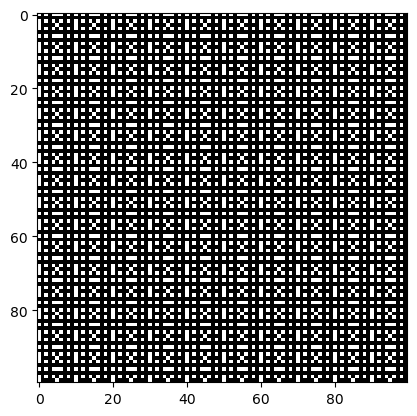

In [22]:
plt.imshow(combo, cmap='gray', vmin=0, vmax=1)
plt.show()

In [74]:
import numpy as np

def calculateRayIntersection(x, y, theta, obstructions,ax):
    # Define the direction vector using theta
    dx = np.cos(theta)
    dy = np.sin(theta)
    
    # Initialize distance to zero
    distance = agent_radius
    
    # Incrementally move along the ray until we hit an obstruction
    while True or distance < 10:
        # Calculate the next position along the ray
        next_x = int(x + distance * dx)
        next_y = int(y + distance * dy)

        # ax.plot(next_x, next_y, 'o', color='blue')
        
        # Check if the next position is within the bounds of the obstructions array
        if next_x < 0 or next_x >= obstructions.shape[1] or next_y < 0 or next_y >= obstructions.shape[0]:
            # If we're out of bounds, return a large value to indicate no intersection
            return distance
        
        # Check if there's an obstruction at the next position
        if obstructions[next_y, next_x]:
            # If there's an obstruction, return the distance to it
            return distance
        
        # Increment the distance along the ray
        distance += 1

# Example usage:
# Create an example obstructions array

In [65]:
agent_radius = 5

In [66]:
import random

In [67]:
size = 40
obstructions = np.full((size,size),False)

for x in range(size):
    for y in range(size):
        if random.random() < .1:
            obstructions[x][y] = True



In [68]:
angleMax = np.pi/4
numRays = 5
angles = np.linspace(-angleMax, angleMax, numRays)

Shortest distance: 19


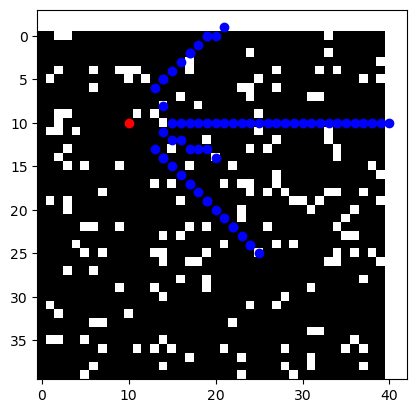

In [69]:
fig, ax = plt.subplots()
x, y = 10, 10
theta = np.pi / 4  # 45 degrees

distances = []
for theta in angles:
    distances.append(calculateRayIntersection(x, y, theta, obstructions, ax))
    
print("Shortest distance:", distance)

ax.imshow(obstructions, cmap='gray', vmin=0, vmax=1)
ax.plot(x, y, 'o', color='red')

In [59]:
distances

[3, 29, 7, 3, 19]